In [1]:
# Importing lib
import numpy as np
import pandas as pd

In [2]:
# Importing Dataset
dataset = pd.read_csv("train.csv")

In [3]:
dataset

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [4]:
# 0 = Ham
# 1 = Spam

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

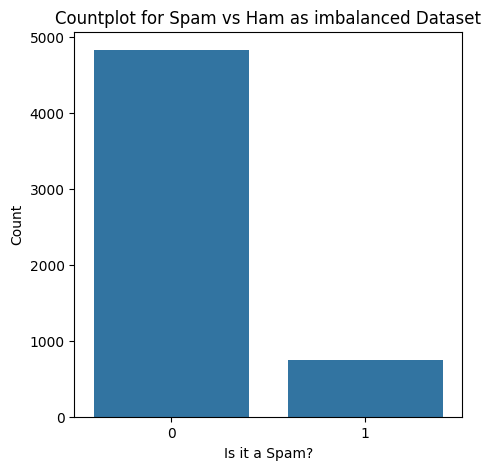

In [8]:
# Countplot for Spam vs Ham as imbalanced Dataset
plt.figure(figsize=(5,5))
g = sns.countplot(x="label", data = dataset)
plt.title('Countplot for Spam vs Ham as imbalanced Dataset')
plt.xlabel('Is it a Spam?')
plt.ylabel('Count')

In [9]:
# Handling the imbalanced Dataset
only_spam = dataset[dataset["label"] == 1]

In [10]:
only_spam

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [11]:
print("No. of Spam SMS:", len(only_spam))
print("No. of Ham SMS:", len(dataset) - len(only_spam))

No. of Spam SMS: 747
No. of Ham SMS: 4827


In [12]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [13]:
count

6

In [14]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])

dataset.shape

(9309, 2)

Text(0, 0.5, 'Count')

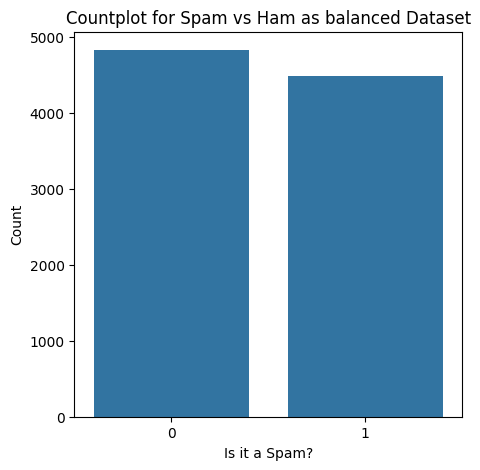

In [15]:
# Countplot for Spam vs Ham as balanced Dataset
plt.figure(figsize=(5,5))
g = sns.countplot(x="label", data = dataset)
plt.title('Countplot for Spam vs Ham as balanced Dataset')
plt.xlabel('Is it a Spam?')
plt.ylabel('Count')

In [16]:
# Creating new feature: word_count
dataset["word_count"] = dataset["sms"].apply(lambda x: len(x.split()))

In [17]:
dataset

,sms,label,word_count
0,"Go until jurong point, crazy.. Available only ...",0,20
1,Ok lar... Joking wif u oni...\n,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,U dun say so early hor... U c already then say...,0,11
4,"Nah I don't think he goes to usf, he lives aro...",0,13
...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28


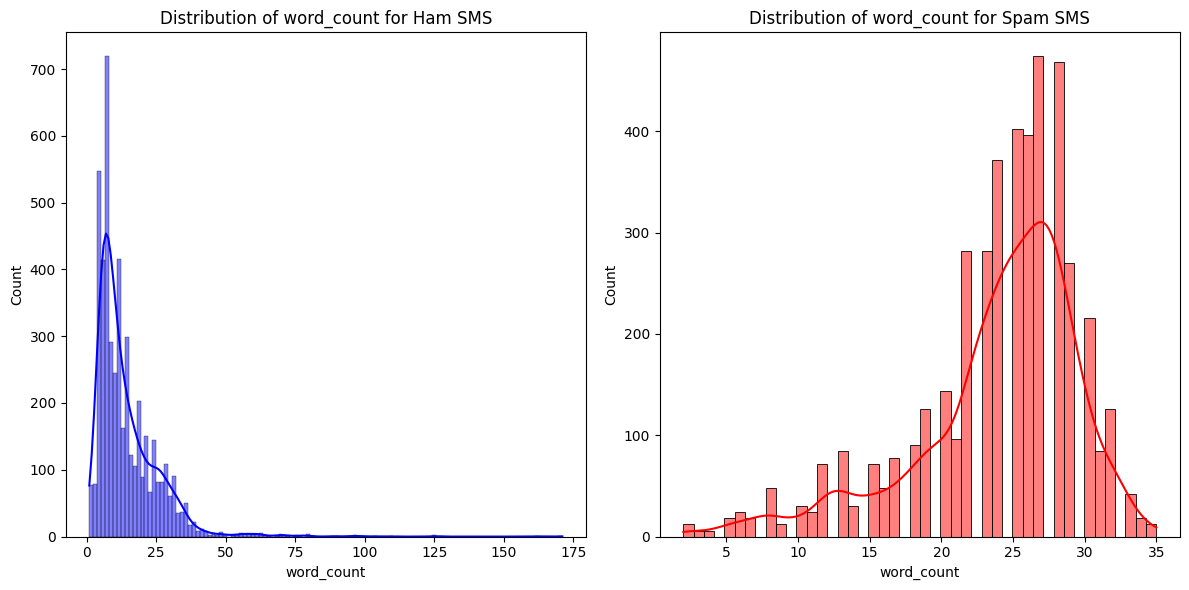

In [18]:
plt.figure(figsize=(12,6))

# (1,1)
plt.subplot(1,2,1)
sns.histplot(dataset[dataset["label"] == 0].word_count,color="blue", kde=True)
plt.title('Distribution of word_count for Ham SMS')

# (1,2)
plt.subplot(1,2,2)
sns.histplot(dataset[dataset["label"] == 1].word_count,color="red", kde=True)
plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [19]:
# Creating new featre of Currency Symbols
def currency_present(data):
    currency_symbols = [ "$", "€", "£", "¥", "₣", "₹"]
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [20]:
dataset["contains_currency_symbols"] = dataset["sms"].apply(currency_present)

In [21]:
dataset

,sms,label,word_count,contains_currency_symbols
0,"Go until jurong point, crazy.. Available only ...",0,20,0
1,Ok lar... Joking wif u oni...\n,0,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,U dun say so early hor... U c already then say...,0,11,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0


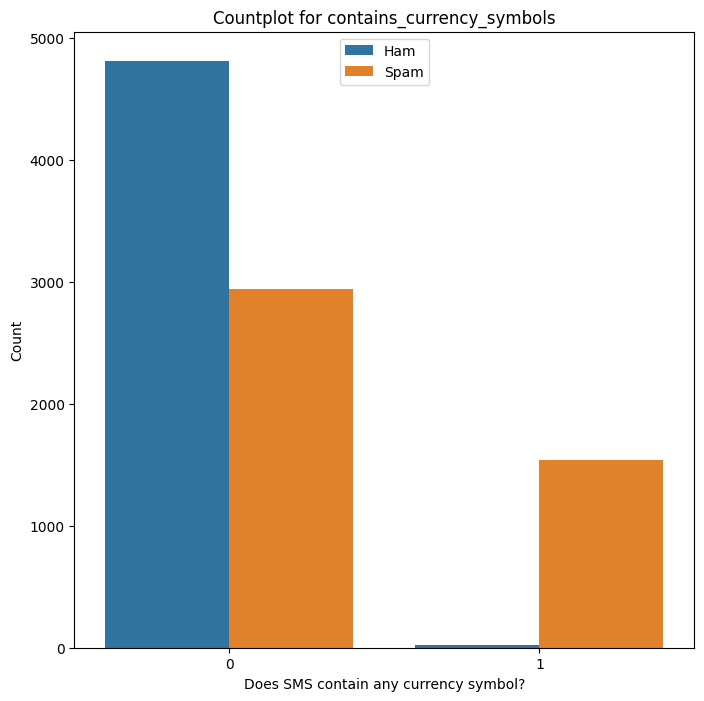

In [22]:
# Countplot for contains_currency_symbols
plt.figure(figsize=(8,8))
sns.countplot(x="contains_currency_symbols", data=dataset, hue = "label")
plt.title('Countplot for contains_currency_symbols')
plt.xlabel('Does SMS contain any currency symbol?')
plt.ylabel('Count')
plt.legend(labels=["Ham", "Spam"], loc = 9)

In [23]:
# Creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [24]:
dataset["contains_number"] = dataset["sms"].apply(number)

In [25]:
dataset

,sms,label,word_count,contains_currency_symbols,contains_number
0,"Go until jurong point, crazy.. Available only ...",0,20,0,0
1,Ok lar... Joking wif u oni...\n,0,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0,1
3,U dun say so early hor... U c already then say...,0,11,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0,0
...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0,1


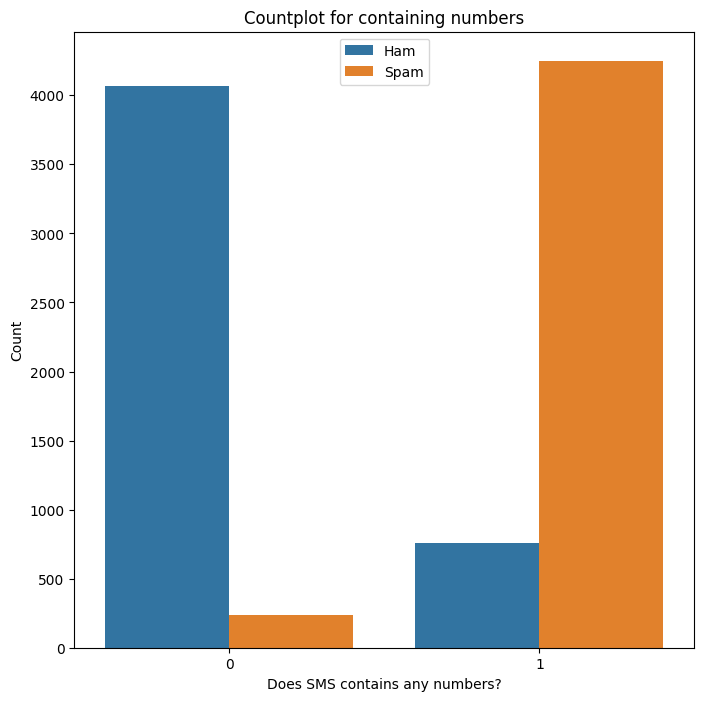

In [26]:
# Countplot for containing numbers
plt.figure(figsize=(8,8))
sns.countplot(x="contains_number", data=dataset, hue = "label")
plt.title('Countplot for containing numbers')
plt.xlabel('Does SMS contains any numbers?')
plt.ylabel('Count')
plt.legend(labels=["Ham", "Spam"], loc = 9)

In [28]:
# Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samyak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samyak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.sms):
    message = re.sub(pattern="[^a-zA-Z]", repl=" ", string=sms) # Filtering out special charachters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lem_words = [wnl.lemmatize(word) for word in filtered_words]
    message = " ".join(lem_words)
    
    corpus.append(message)

In [30]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [31]:
# Creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [32]:
x = pd.DataFrame(vectors, columns = feature_names)
y = dataset["label"]

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
2362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [37]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       954
           1       0.94      0.93      0.94       908

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[900,  54],
       [ 62, 846]], dtype=int64)

Text(70.72222222222221, 0.5, 'Predicted Values')

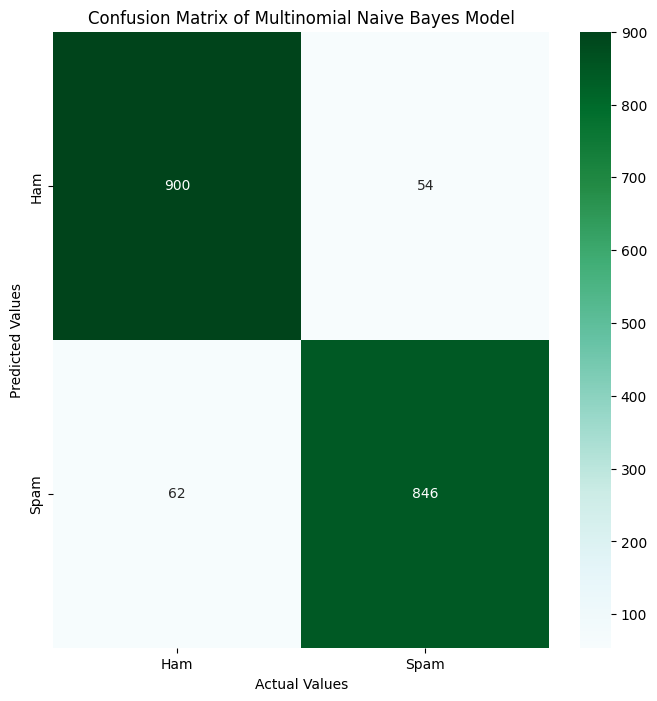

In [43]:
plt.figure(figsize=(8,8))
axis_labels = ["Ham", "Spam"]
sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt="g", cmap="BuGn")
plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_1 = cross_val_score(dt, x, y, scoring='f1', cv=10)
print(round(cv_1.mean(),3))
print(round(cv_1.std(),3))

0.98
0.004


In [45]:
dt.fit(x_train, y_train)
y_pred_1 = dt.predict(x_test)

In [46]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       954
           1       0.98      0.99      0.99       908

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



In [47]:
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_1

array([[933,  21],
       [  5, 903]], dtype=int64)

Text(70.72222222222221, 0.5, 'Predicted Values')

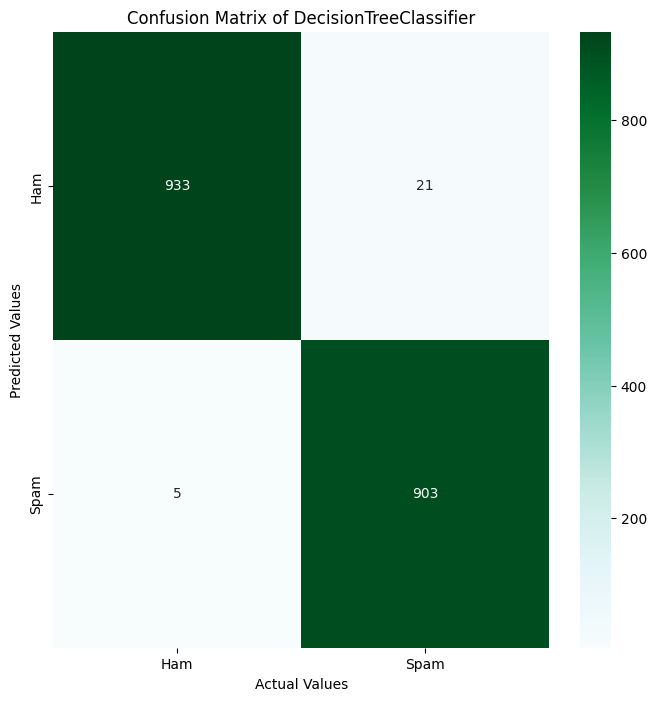

In [48]:
plt.figure(figsize=(8,8))
axis_labels = ["Ham", "Spam"]
sns.heatmap(data=cm_1, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt="g", cmap="BuGn")
plt.title("Confusion Matrix of DecisionTreeClassifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [49]:
def predict_spam(sms):
    message = re.sub(pattern="[^a-zA-Z]", repl=" ", string=sms) # Filtering out special charachters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lem_words = [wnl.lemmatize(word) for word in filtered_words]
    message = " ".join(lem_words)
    temp_var = tfidf.transform([message]).toarray()
    return mnb.predict(temp_var)

In [50]:
sample_message ="HURRAY! A lottery of 5 crore. Your good days are here, please follow the link below: [https://Win.lottery_money.com]"

if predict_spam(sample_message):
    print("It is a SPAM")
else:
    print("This is a HAM message ")

It is a SPAM


C:\Users\Samyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
